In [2]:
pip install -U pymoo

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
# from pymoo.problems import get_problem
from pymoo.core.problem import Problem
from pymoo.visualization.scatter import Scatter

問題設定

In [4]:
class MyProblem(Problem):
    def __init__(self):
        super().__init__(n_var=2, 
                         n_obj=2, 
                         n_constr=0, 
                         xl=np.array([-1, -1]), 
                         xu=np.array([1, 1]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[:, 0]
        f2 = x[:, 0]**2 + x[:, 1]**2
        out["F"] = np.column_stack([f1, f2])
    
    def _calc_pareto_front(self, n_pareto_points=100):
        x = np.linspace(-1, 0, n_pareto_points)
        return np.array([x, x**2]).T 
    
    def _calc_pareto_set(self, n_pareto_points=100):
        x = np.linspace(-1, 0, n_pareto_points)
        # return np.array([x, 0]).T
        return np.array([x, np.zeros_like(x)]).T

Solverを実行

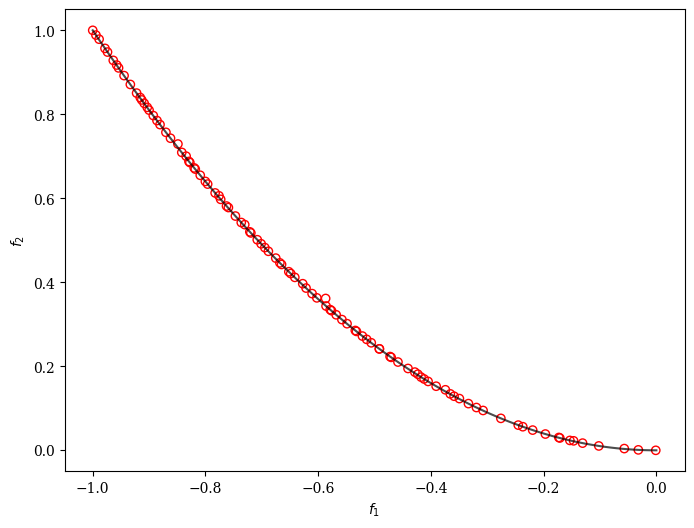

In [5]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

problem = MyProblem()
algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

Pareto front

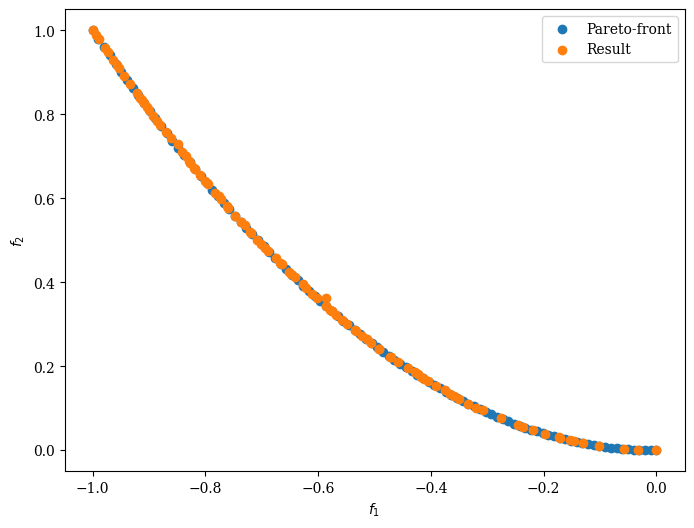

In [6]:
#Pareto front

## The pareto front of a scaled problem
pf = problem.pareto_front()

## The result found by an algorithm
AF = res.F

# plot the result
Scatter(legend=True).add(pf, label="Pareto-front").add(AF, label="Result").show()

Pareto set

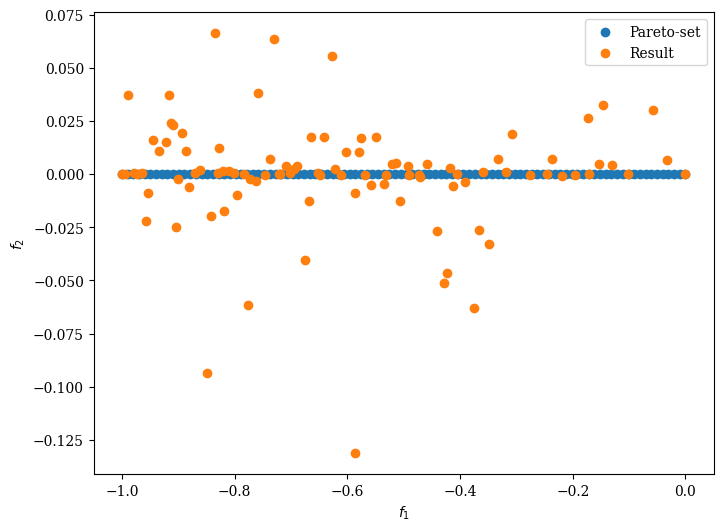

In [7]:
#Pareto set

## The pareto set of a scaled problem
ps = problem.pareto_set()

## The result found by an algorithm
AS = res.X

# plot the result
Scatter(legend=True).add(ps, label="Pareto-set").add(AS, label="Result").show()

Performance indicators

In [8]:
from pymoo.indicators.gd import GD
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV

ind = GD(pf)
print("GD", ind(AF))

ind = IGD(pf)
print("IGD", ind(AF))

ind = GD(ps)
print("GDX", ind(AS))

ind = IGD(ps)
print("IGDX", ind(AS))

ref_point = np.array([0, 1])
ind = HV(ref_point=ref_point)
print("HV", ind(AF))

GD 0.004455298611581355
IGD 0.005361345238403553
GDX 0.015681591317700416
IGDX 0.007590496933761275
HV 0.6605517357155681
